In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn.compose import TransformedTargetRegressor
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score
from datetime import date

In [2]:
start = time.process_time()

In [3]:
df = pd.read_csv('/Users/josephbrennan/Desktop/Data/Merged/bt_merged.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df['Date'] = pd.to_datetime(df.Date)
df.index = pd.DatetimeIndex(df.Date)
table_dates = df.Date
df.drop('Date', axis=1, inplace=True)
df.head()

,Open,High,Low,Close,Volume,network,BT,EE,data,services,communications
Date,,,,,,,,,,,
2017-01-03,304.285206,308.339622,302.278470,304.244263,14324026,92,91,95,83,91,85
2017-01-04,305.104266,311.902552,299.411707,311.697784,22025318,95,93,94,87,94,93
2017-01-05,313.376907,316.202690,307.416515,314.851227,18310312,94,85,90,92,94,81
2017-01-06,315.506507,315.547451,312.557843,314.974091,12651601,92,88,80,85,87,83
2017-01-09,316.366531,316.898922,311.943547,316.120819,13307527,93,86,94,92,99,85


In [4]:
df.isna().sum()

Open              0
High              0
Low               0
Close             0
Volume            0
network           0
BT                0
EE                0
data              0
services          0
communications    0
dtype: int64

In [5]:
#Last row of data used to predict
compare_price = df.tail(1)
compare_price

,Open,High,Low,Close,Volume,network,BT,EE,data,services,communications
Date,,,,,,,,,,,
2021-06-29,199.25,200.199997,194.080002,195.5,27664600,99,91,84,83,89,88


In [6]:
#Get all data except last row (actual_price)
df = df.head(len(df)-1)
df

,Open,High,Low,Close,Volume,network,BT,EE,data,services,communications
Date,,,,,,,,,,,
2017-01-03,304.285206,308.339622,302.278470,304.244263,14324026,92,91,95,83,91,85
2017-01-04,305.104266,311.902552,299.411707,311.697784,22025318,95,93,94,87,94,93
2017-01-05,313.376907,316.202690,307.416515,314.851227,18310312,94,85,90,92,94,81
2017-01-06,315.506507,315.547451,312.557843,314.974091,12651601,92,88,80,85,87,83
2017-01-09,316.366531,316.898922,311.943547,316.120819,13307527,93,86,94,92,99,85
...,...,...,...,...,...,...,...,...,...,...,...
2021-06-22,203.300003,205.899994,202.300003,202.600006,21598840,92,93,90,87,89,85
2021-06-23,202.600006,206.699997,202.600006,205.300003,23236417,94,89,80,86,91,88
2021-06-24,205.699997,206.121002,201.199997,202.699997,32798265,93,87,88,90,90,95


In [7]:
#Convert to OneHotEncoder
df = pd.get_dummies(df)

In [8]:
y = df.iloc[:, 3]
X = df.iloc[:, [0, 1, 2, 4, 5, 6, 7, 8, 9, 10]]

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [10]:
#Save for Later
tab_y = y

In [11]:
y = y.values.reshape(-1,1)
print(y.shape)

(1134, 1)


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle=False)

In [13]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [14]:
model = SVR(kernel='poly', C=1, gamma='auto', degree=3, epsilon=0.1,
               coef0=1)

In [15]:
model.fit(X_train, np.ravel(y_train))

SVR(C=100, coef0=1, gamma='auto', kernel='poly')

In [16]:
y_pred = model.predict(X_test)

In [17]:
actual_price = compare_price.iloc[0,3]
actual_price

195.5

In [18]:
next_day_price = y_pred[-1]
print(next_day_price)

306.9208735809092


In [19]:
#Model Evaluation Scores
from sklearn import metrics

print('R-squared score: ', model.score(X_test, y_test))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
mape = np.mean(np.abs((y_test - y_pred) / np.abs(y_test)))
print('Mean Absolute Percentage Error (MAPE):', round(mape * 100, 2))
print('Accuracy:', round(100*(1 - mape), 2))

R-squared score:  -10.629179467938355
Mean Absolute Error: 84.21061757453583
Mean Squared Error: 7160.659947639562
Root Mean Squared Error: 84.62068274151162
Mean Absolute Percentage Error (MAPE): 70.59
Accuracy: 29.41


In [20]:
dates = df.index

In [21]:
true_data =pd.DataFrame(data = {'date': dates, 'actual': tab_y})
true_data

,date,actual
Date,,
2017-01-03,2017-01-03,304.244263
2017-01-04,2017-01-04,311.697784
2017-01-05,2017-01-05,314.851227
2017-01-06,2017-01-06,314.974091
2017-01-09,2017-01-09,316.120819
...,...,...
2021-06-22,2021-06-22,202.600006
2021-06-23,2021-06-23,205.300003
2021-06-24,2021-06-24,202.699997


In [22]:
tab_y.shape

(1134,)

In [23]:
test_dates = table_dates[1-(len(y_pred)+1):]

In [24]:
predictions_data = pd.DataFrame(data = {'date': test_dates, 'predictions':y_pred})
predictions_data

,date,predictions
Date,,
2020-02-21,2020-02-21,247.620590
2020-02-24,2020-02-24,246.429858
2020-02-25,2020-02-25,242.591412
2020-02-26,2020-02-26,238.803113
2020-02-27,2020-02-27,236.518116
...,...,...
2021-06-23,2021-06-23,309.562598
2021-06-24,2021-06-24,312.055561
2021-06-25,2021-06-25,306.126154


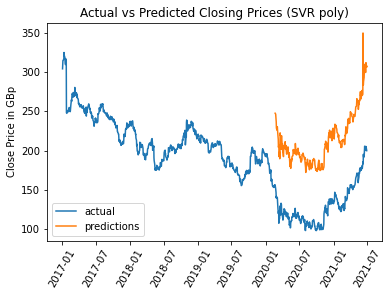

In [25]:
plt.plot(true_data['date'], true_data['actual'], label = 'actual')
plt.plot(predictions_data['date'], predictions_data['predictions'], label='predictions')
plt.xticks(rotation='60')
plt.ylabel("Close Price in GBp")
plt.title("Actual vs Predicted Closing Prices (SVR poly)")
plt.legend()
plt.show()

In [26]:
 print(time.process_time() - start)

9.976166000000001
